# Introduction to Machine Learning and Toolkit Exercises 

# What is Machine Learning?

| This | is   |
|------|------|
|   Machine learning allows computers to learn and infer from data.  | ![robot.png](Assets/robot.png)|



# Learning Objectives

- Demonstrate supervised learning algorithms
- Explain key concepts like under- and over-fitting, regularization, and cross-validation
- Classify the type of problem to be solved, choose the right algorithm, tune parameters, and validate a model
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware

# Overview of Course:

### Topics include:

- Introduction and exploratory analysis (Week 1)
- Supervised machine learning (Weeks 2 – 10)
- Unsupervised machine learning (Weeks 11 – 12)

### Prerequisites:

- Python* programming
- Calculus
- Linear algebra
- Statistics

### Lab Preparation:
- pip install -r ../requirements.txt

### Our Toolset: Intel® oneAPI AI Analytics Toolkit (AI Kit)
- Intel® Extension for Scikit-learn*

### Intel® oneAPI Toolkits Installation 
The [following documents](https://software.intel.com/content/www/us/en/develop/articles/installation-guide-for-intel-oneapi-toolkits.html) provide detailed instructions on how to get and install Intel® oneAPI packages using different installer modes and package managers:

- [Intel® oneAPI Toolkits Installation Guide for Linux* OS](https://software.intel.com/content/www/us/en/develop/documentation/installation-guide-for-intel-oneapi-toolkits-linux/top.html)
- [Intel® oneAPI Toolkits Installation Guide for Windows*](https://software.intel.com/content/www/us/en/develop/documentation/installation-guide-for-intel-oneapi-toolkits-windows/top.html)
- [Intel® oneAPI Toolkits Installation Guide for macOS*](https://software.intel.com/content/www/us/en/develop/documentation/installation-guide-for-intel-oneapi-toolkits-macos/top.html)



## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `Iris_Data.csv` found in the [data](../../data) directory.

In [1]:
from __future__ import print_function
import os
data_path = [ '../data']



# scikit-learn* 

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written. 

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed. 

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems. 

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code Prior to importing sklearn: 

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**


## Question 1

Load the data from the file (data/Iris_Data.csv) using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Datasets/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
num_rows  = df.shape[0]
num_rows

150

In [4]:
column_names = df.columns.tolist()
column_names

['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

In [5]:
data_types = df.dtypes

data_types

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [6]:
df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [7]:
print(df['variety'].value_counts())


variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


In [8]:
df_numeric = df.drop(columns=["variety"])
df_numeric.head()
statistics = {
    "Mean": df_numeric.mean(),
    "Median": df_numeric.median(),
    "25th Percentile (Q1)": df_numeric.quantile(0.25),
    "50th Percentile (Q2)": df_numeric.quantile(0.50),
    "75th Percentile (Q3)": df_numeric.quantile(0.75),
    "Range (Max - Min)": df_numeric.max() - df_numeric.min()
}
stats_df = pd.DataFrame(statistics)
stats_df

,Mean,Median,25th Percentile (Q1),50th Percentile (Q2),75th Percentile (Q3),Range (Max - Min)
sepal.length,5.843333,5.80,5.1,5.80,6.4,3.6
sepal.width,3.057333,3.00,2.8,3.00,3.3,2.4
petal.length,3.758000,4.35,1.6,4.35,5.1,5.9
petal.width,1.199333,1.30,0.3,1.30,1.8,2.4


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [9]:
mean_values = df.groupby("variety").mean()
median_values = df.groupby("variety").median()
print("Mean values grouped by variety:\n", mean_values)
print("\nMedian values grouped by variety:\n", median_values) 

Mean values grouped by variety:
             sepal.length  sepal.width  petal.length  petal.width
variety                                                         
Setosa             5.006        3.428         1.462        0.246
Versicolor         5.936        2.770         4.260        1.326
Virginica          6.588        2.974         5.552        2.026

Median values grouped by variety:
             sepal.length  sepal.width  petal.length  petal.width
variety                                                         
Setosa               5.0          3.4          1.50          0.2
Versicolor           5.9          2.8          4.35          1.3
Virginica            6.5          3.0          5.55          2.0


## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

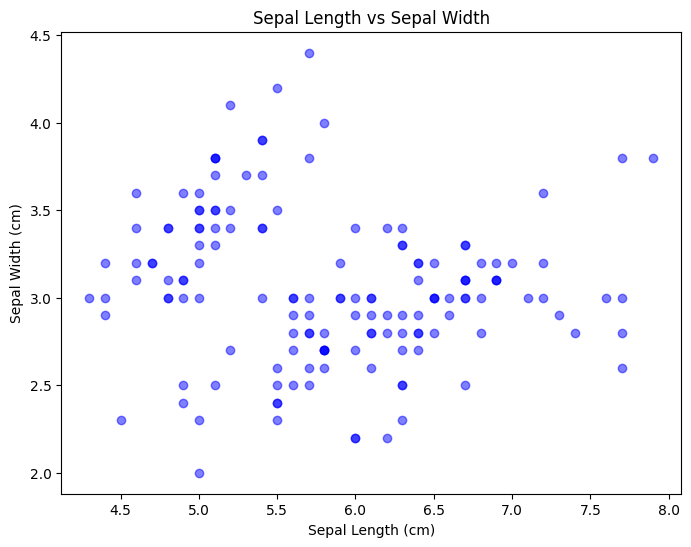

In [10]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['sepal.length'], df['sepal.width'], color='blue', alpha=0.5)

# Label the axes and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')

# Show the plot
plt.show()


## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

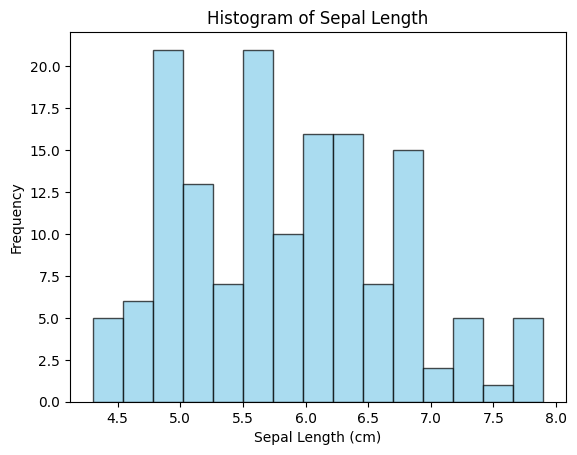

In [11]:
plt.hist(df['sepal.length'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)

# Label the axes and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')

# Show the plot
plt.show()


## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

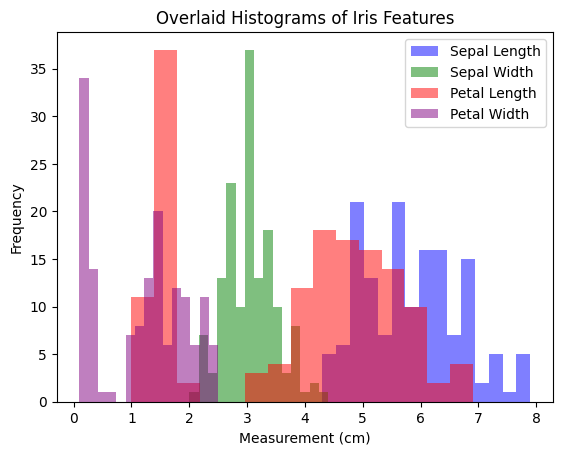

In [12]:
# Plot histograms for each feature
plt.hist(df['sepal.length'], bins=15, color='blue', alpha=0.5, label='Sepal Length')
plt.hist(df['sepal.width'], bins=15, color='green', alpha=0.5, label='Sepal Width')
plt.hist(df['petal.length'], bins=15, color='red', alpha=0.5, label='Petal Length')
plt.hist(df['petal.width'], bins=15, color='purple', alpha=0.5, label='Petal Width')

# Labels, title, and legend
plt.xlabel('Measurement (cm)')
plt.ylabel('Frequency')
plt.title('Overlaid Histograms of Iris Features')
plt.legend()

# Show the plot
plt.show()


## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

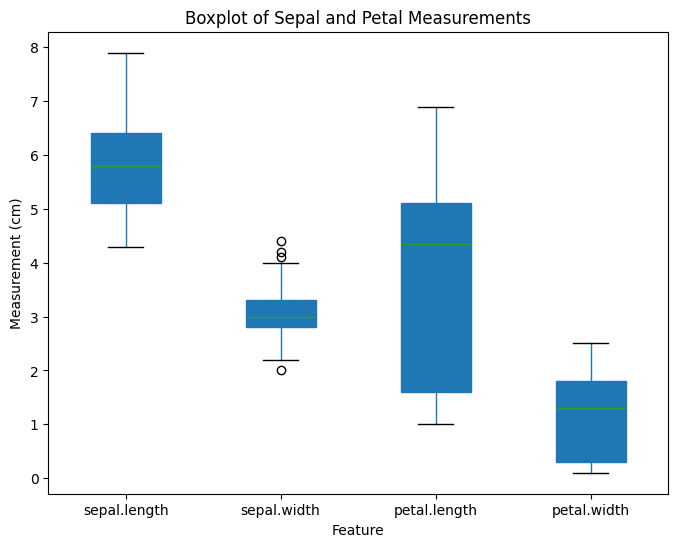

In [14]:
# Create a boxplot for each feature
df.boxplot(column=['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], 
           grid=False, figsize=(8, 6), patch_artist=True)

# Label the axes and title
plt.xlabel('Feature')
plt.ylabel('Measurement (cm)')
plt.title('Boxplot of Sepal and Petal Measurements')

# Show the plot
plt.show()


## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

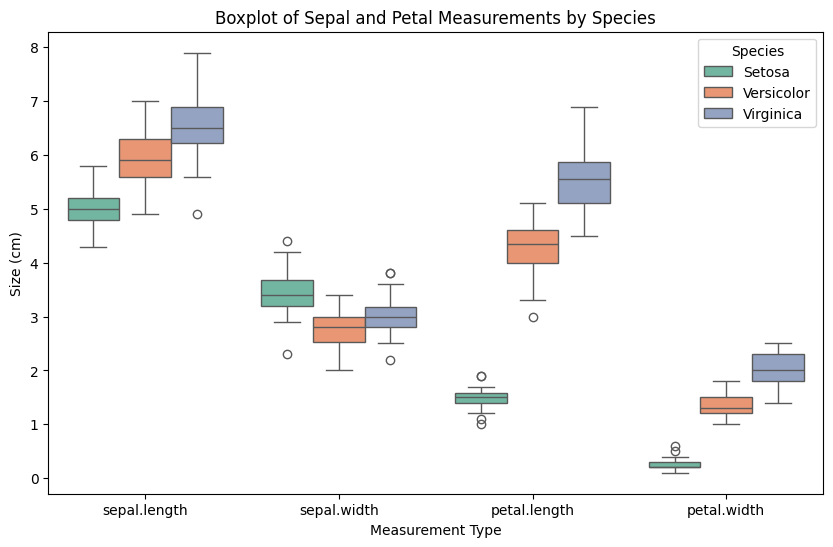

In [15]:

import seaborn as sns

# Rename columns for consistency (if needed)
df.rename(columns={'variety': 'species'}, inplace=True)

# Convert dataset to long format
df_melted = df.melt(id_vars=['species'], 
                    value_vars=['sepal.length', 'sepal.width', 'petal.length', 'petal.width'],
                    var_name='measurement', 
                    value_name='size')

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='measurement', y='size', hue='species', palette='Set2')

# Customize labels and title
plt.xlabel('Measurement Type')
plt.ylabel('Size (cm)')
plt.title('Boxplot of Sepal and Petal Measurements by Species')
plt.legend(title='Species')

# Show the plot
plt.show()


## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

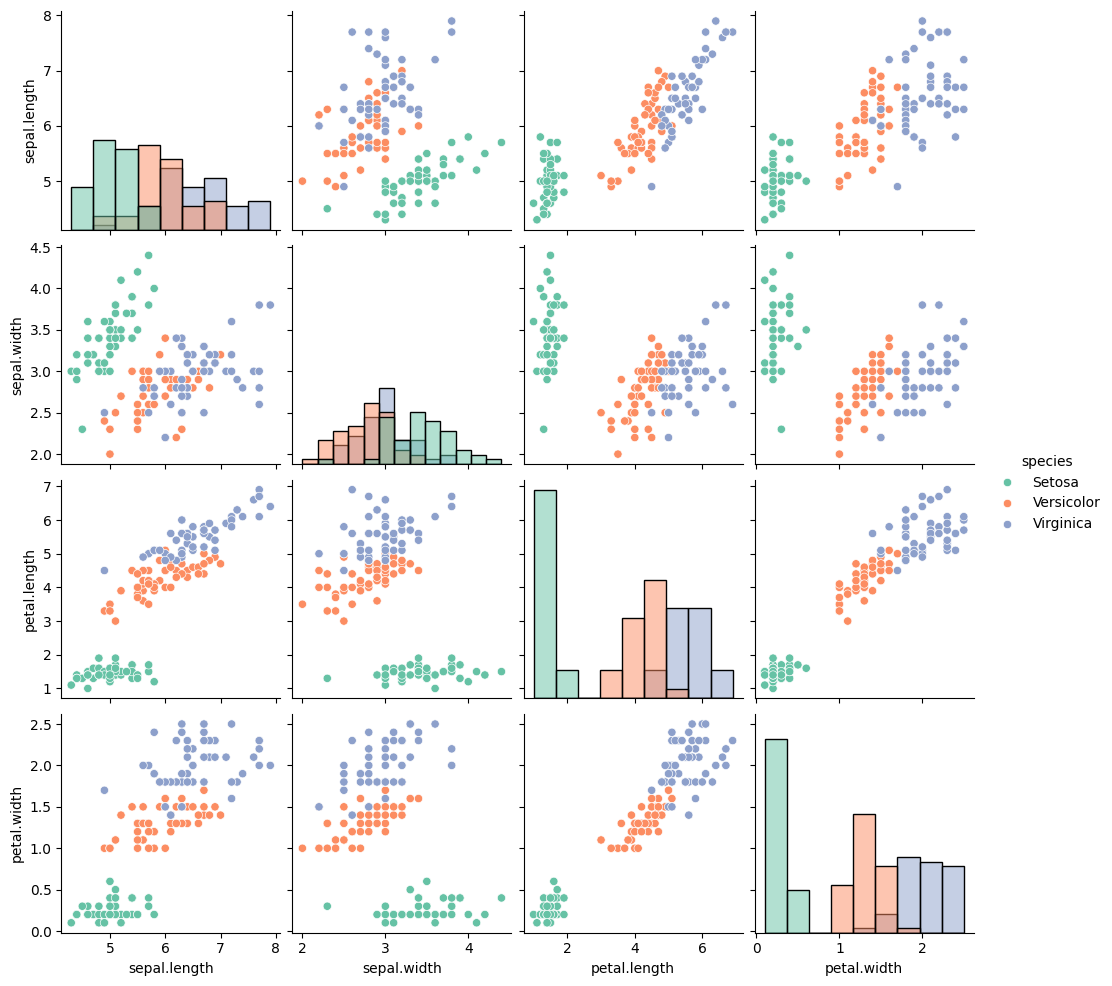

In [16]:
sns.pairplot(df, hue='species', palette='Set2', diag_kind='hist')

plt.show()